# Objective

Demo and explore the performance of scikit-image's blob_log() blob finding algorithm.

240 seconds to run blob_log() on 71 images in jupyter notebook.

245 seconds to run blob_log() on 71 images in python interpreter.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from skimage.feature import blob_log
from skimage.io import imread
from scipy.stats import linregress
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings('ignore')

# Test all 71 images

In [2]:
names_raw = pd.read_csv('names.csv', header=None)
names = [x[0][:-4] for x in names_raw.values]

In [3]:
len(names)

71

In [4]:
gt_counts, pred_counts = [], []
for i in range(len(names)):
    print(i, '/', len(names))
    name = names[i]
    im = imread('./all_test_images/%s.tif' % name)
    df = pd.read_csv('./all_test_gt/%s.csv' % name)
    blobs_log = blob_log(im, min_sigma=5, max_sigma=15, threshold=0.02)
    gt_counts.append(len(df))
    pred_counts.append(len(blobs_log))

0 / 71
1 / 71
2 / 71
3 / 71
4 / 71
5 / 71
6 / 71
7 / 71
8 / 71
9 / 71
10 / 71
11 / 71
12 / 71
13 / 71
14 / 71
15 / 71
16 / 71
17 / 71
18 / 71
19 / 71
20 / 71
21 / 71
22 / 71
23 / 71
24 / 71
25 / 71
26 / 71
27 / 71
28 / 71
29 / 71
30 / 71
31 / 71
32 / 71
33 / 71
34 / 71
35 / 71
36 / 71
37 / 71
38 / 71
39 / 71
40 / 71
41 / 71
42 / 71
43 / 71
44 / 71
45 / 71
46 / 71
47 / 71
48 / 71
49 / 71
50 / 71
51 / 71
52 / 71
53 / 71
54 / 71
55 / 71
56 / 71
57 / 71
58 / 71
59 / 71
60 / 71
61 / 71
62 / 71
63 / 71
64 / 71
65 / 71
66 / 71
67 / 71
68 / 71
69 / 71
70 / 71


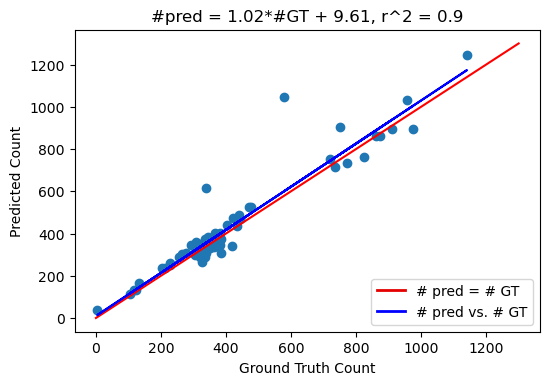

In [10]:
plt.figure(figsize=(6,4), dpi=100)
plt.scatter(gt_counts, pred_counts)
plt.plot([0, 1300], [0, 1300], color='r')
plt.xlabel('Ground Truth Count')
plt.ylabel('Predicted Count')

slope, intercept, r_value, p_value, std_err = linregress(gt_counts, pred_counts)
plt.plot(gt_counts, intercept + [slope*x for x in gt_counts], color='blue')
plt.title('#pred = %s*#GT + %s, r^2 = %s' % (str(round(slope,2)), str(round(intercept,2)), str(round(r_value**2,2))))

handle_list = []
handle_list.append(Line2D([0],[0], marker=None, color='xkcd:red', lw=2, label='# pred = # GT'))
handle_list.append(Line2D([0],[0], marker=None, color='blue', lw=2, label='# pred vs. # GT'))

plt.legend(handles=handle_list, loc='lower right', fontsize=10)

plt.show()

# Omit outliers

Omitting the three images where pred_count/gt_count > 1.3.

In [11]:
data = pd.DataFrame(
    {'gt_count': gt_counts,
     'pred_count': pred_counts,
     'name': names
    })

In [12]:
data_minus_outliers = data[data.pred_count/data.gt_count <= 1.3]
len(data_minus_outliers)

68

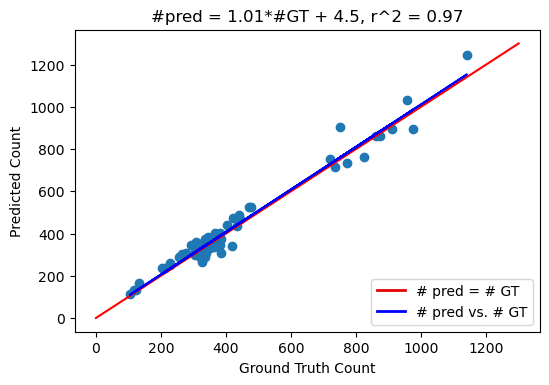

In [13]:
plt.figure(figsize=(6,4), dpi=100)
plt.scatter(data_minus_outliers.gt_count, data_minus_outliers.pred_count)
plt.plot([0, 1300], [0, 1300], color='r')
plt.xlabel('Ground Truth Count')
plt.ylabel('Predicted Count')

slope, intercept, r_value, p_value, std_err = linregress(data_minus_outliers.gt_count, data_minus_outliers.pred_count)
plt.plot(data_minus_outliers.gt_count, intercept + [slope*x for x in data_minus_outliers.gt_count], color='blue')
plt.title('#pred = %s*#GT + %s, r^2 = %s' % (str(round(slope,2)), str(round(intercept,2)), str(round(r_value**2,2))))

handle_list = []
handle_list.append(Line2D([0],[0], marker=None, color='xkcd:red', lw=2, label='# pred = # GT'))
handle_list.append(Line2D([0],[0], marker=None, color='blue', lw=2, label='# pred vs. # GT'))

plt.legend(handles=handle_list, loc='lower right', fontsize=10)

plt.show()

# Inspect some of the decently-counted images.

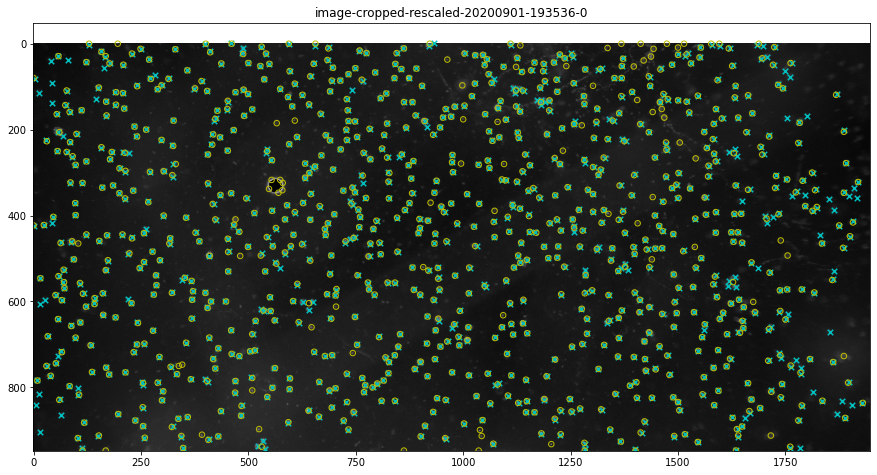

count_predicted:	 924
count_ground_truth:	  957


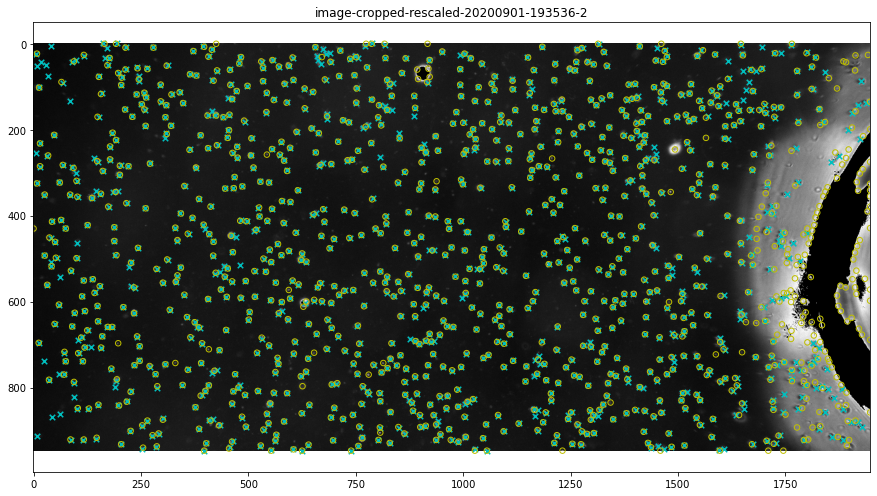

count_predicted:	 1141
count_ground_truth:	  1141


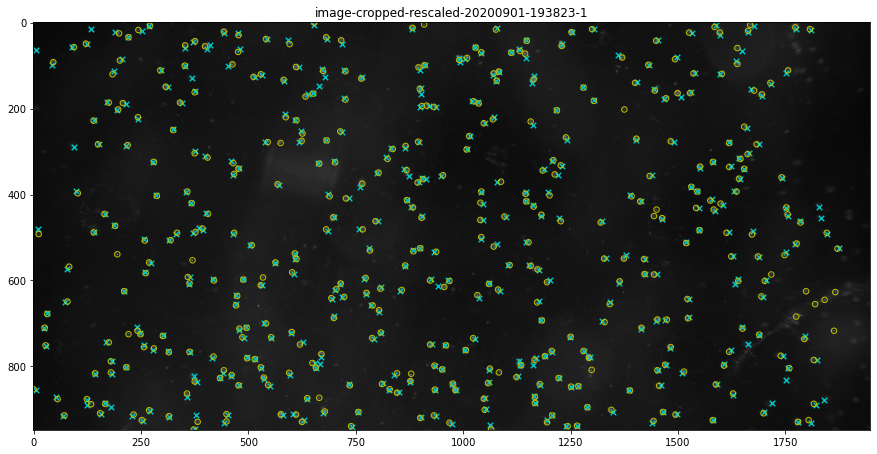

count_predicted:	 418
count_ground_truth:	  423


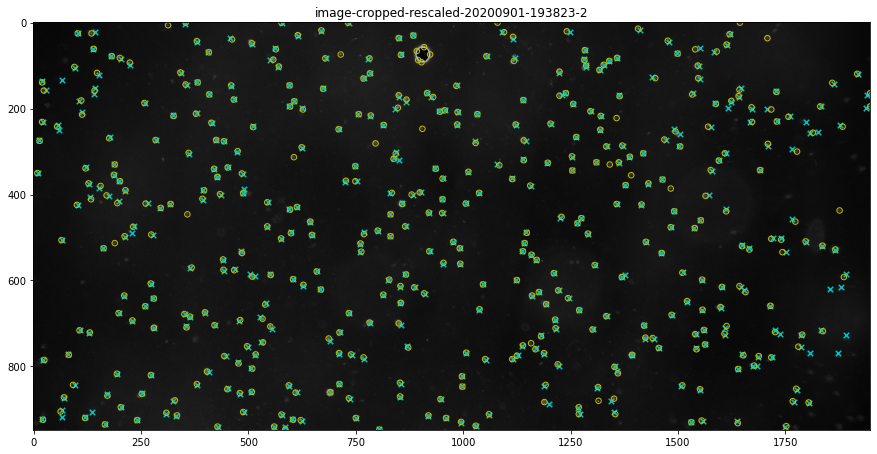

count_predicted:	 439
count_ground_truth:	  439


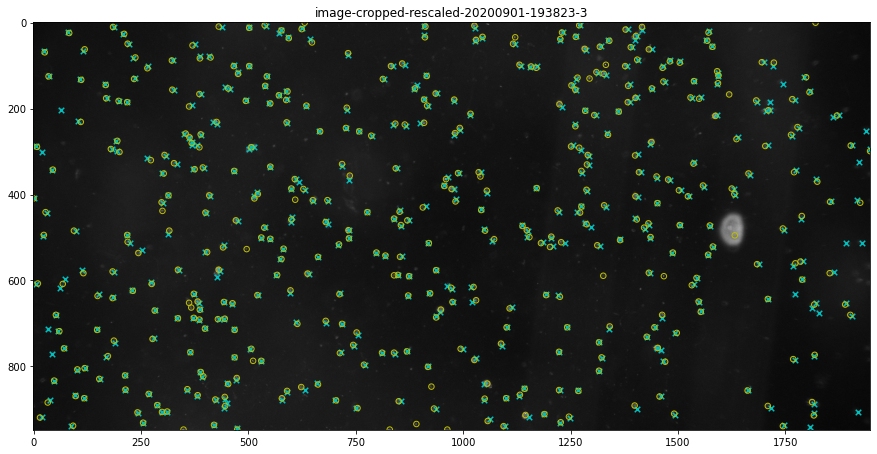

count_predicted:	 431
count_ground_truth:	  443


In [22]:
for name in names[:5]:
    if name in overpred or name in underpred:
        continue
    im = imread('./all_test_images/%s.tif' % name)
    df = pd.read_csv('./all_test_gt/%s.csv' % name)
    blobs_log = blob_log(im, min_sigma=5, max_sigma=15, threshold=0.03)
    plt.figure(figsize=(15,10))
    plt.imshow(im, cmap='gray')
    plt.scatter(df.X, df.Y, s=30, marker='x', color='c')
    plt.scatter(blobs_log[:,1], blobs_log[:,0], s=30, facecolor='None', edgecolor='y')
    plt.title(name)
    plt.show()
    print('count_predicted:\t', len(blobs_log))
    print('count_ground_truth:\t ', len(df))

# Inspect overcounted images.

Inspect the three images where pred_count/gt_count > 1.3.

## Observation

Of the three points on the scatter plot noticeably above the red line (where too many “cells” are counted), two images have giant bubbles and one image is mostly empty.

Note that even at its best, the luminoth model was over-predicting in the areas around these giant bubbbles as well.
https://nbviewer.jupyter.org/github/JennyVoPhamhi/notebooks/blob/master/inspect_prediction_results_20201112.ipynb

In [15]:
overpred = []
print('gt', '\t', 'pred', '\t', 'name\n')
for g, p, name in zip(gt_counts, pred_counts, names):
    if p/g > 1.3:
        print(g, '\t', p, '\t', name)
        overpred.append(name)

gt 	 pred 	 name

579 	 1046 	 image-cropped-rescaled-20200916-192532-4
340 	 614 	 image-cropped-rescaled-20201002-131101-4
4 	 40 	 image-cropped-rescaled-20201002-145125-4


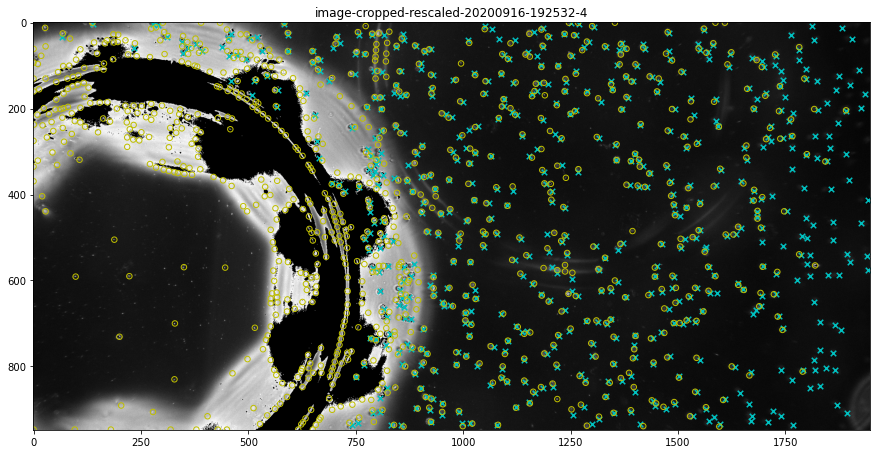

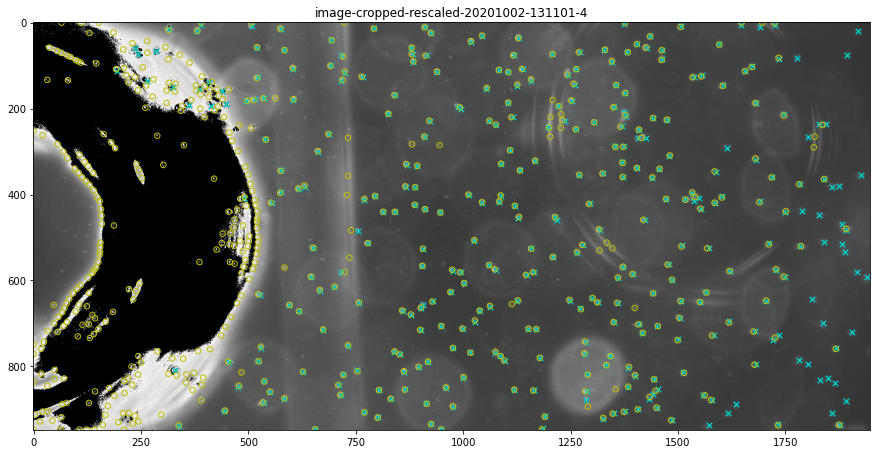

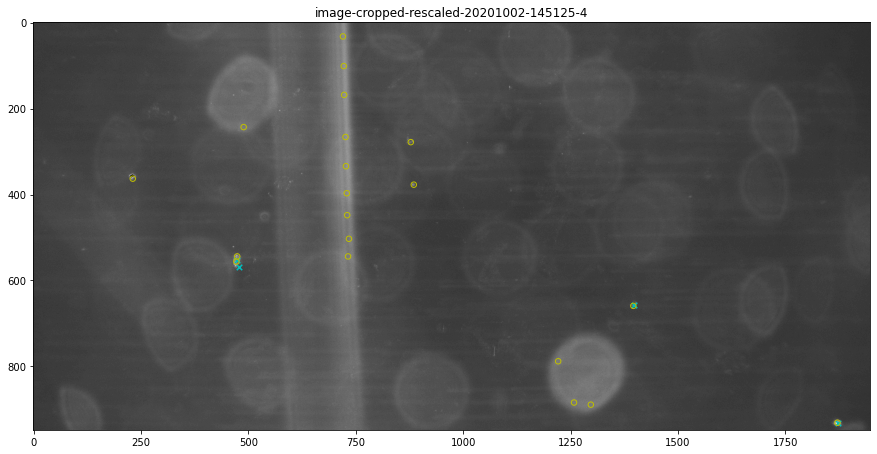

In [16]:
for name in overpred:
    im = imread('./all_test_images/%s.tif' % name)
    df = pd.read_csv('./all_test_gt/%s.csv' % name)
    blobs_log = blob_log(im, min_sigma=5, max_sigma=15, threshold=0.03)
    plt.figure(figsize=(15,10))
    plt.imshow(im, cmap='gray')
    plt.scatter(df.X, df.Y, s=30, marker='x', color='c')
    plt.scatter(blobs_log[:,1], blobs_log[:,0], s=30, facecolor='None', edgecolor='y')
    plt.title(name)
    plt.show()

# Inspect undercounted images

Inspect the three images where pred_count/gt_count < 0.85.

### Observation

The cells being missed are the ones on the edges, and when the image has bits of debris.

blob_log() with these parameters actually has no problem finding the cells that are in the "ghosts."

In [17]:
underpred = []
print('gt', '\t', 'pred', '\t', 'name\n')
for g, p, name in zip(gt_counts, pred_counts, names):
    if p/g < 0.85:
        print(g, '\t', p, '\t', name)
        underpred.append(name)

gt 	 pred 	 name

385 	 306 	 image-cropped-rescaled-20201002-125630-0
326 	 265 	 image-cropped-rescaled-20201002-125630-2
419 	 339 	 image-cropped-rescaled-20201002-142245-4


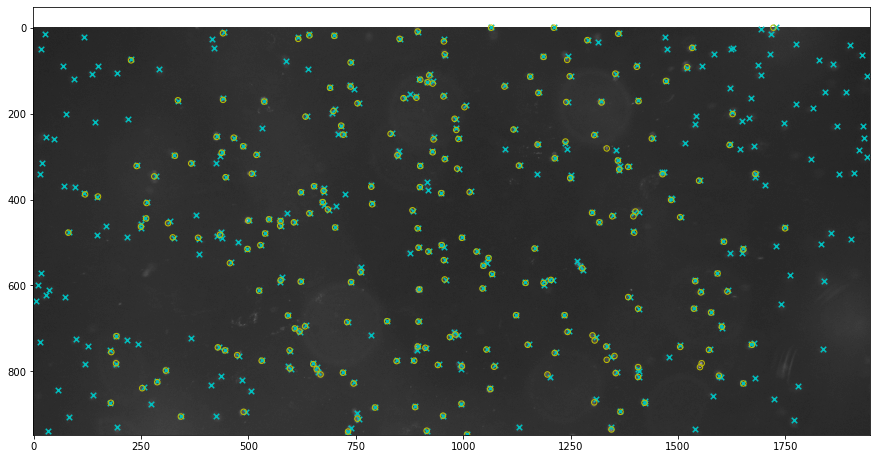

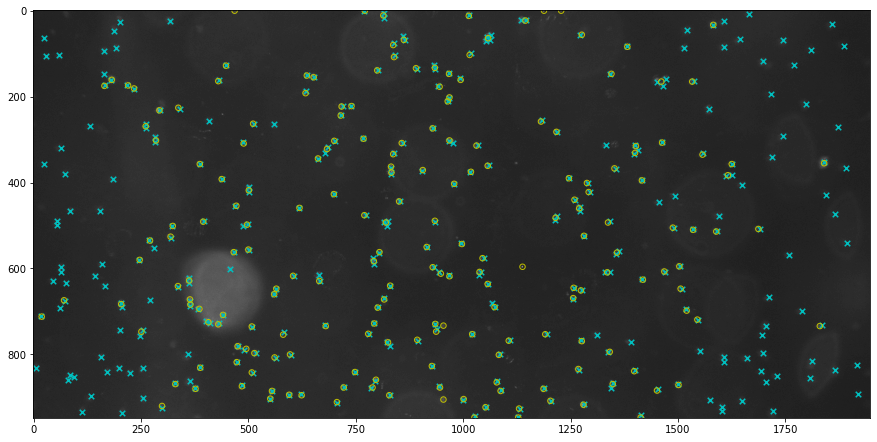

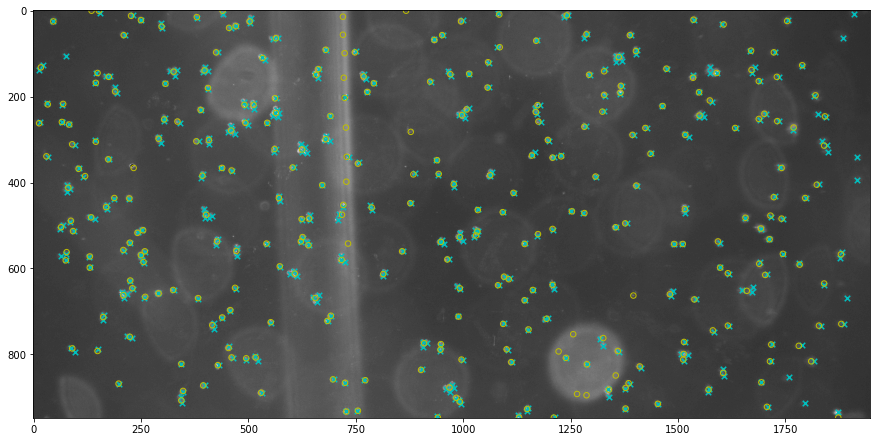

In [18]:
for name in underpred:
    im = imread('./all_test_images/%s.tif' % name)
    df = pd.read_csv('./all_test_gt/%s.csv' % name)
    blobs_log = blob_log(im, min_sigma=5, max_sigma=15, threshold=0.03)
    plt.figure(figsize=(15,10))
    plt.imshow(im, cmap='gray')
    plt.scatter(df.X, df.Y, s=30, marker='x', color='c')
    plt.scatter(blobs_log[:,1], blobs_log[:,0], s=30, facecolor='None', edgecolor='y')
    plt.show()